In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.model_selection import GridSearchCV

In [62]:
df_train = pd.read_csv('train.csv', sep = ",")
df_test = pd.read_csv('test.csv', sep = ",")

In [63]:
num_cols = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_cols = ['Sex','Embarked']

Exercise 1

In [64]:
df_train['Count'] = 1
df_train['Dead'] = (df_train.Survived + 1) % 2
df_train.groupby(['Pclass', 'Sex'])[['Survived', 'Dead', 'Count']].sum()

Survived  Dead  Count
Pclass Sex                          
1      female        91     3     94
       male          45    77    122
2      female        70     6     76
       male          17    91    108
3      female        72    72    144
       male          47   300    347

Exercise 2

In [65]:
print("Для мужчини")
print(df_train[df_train.Sex == "female"][num_cols].describe())
print()

print("Для женщин")
print(df_train[df_train.Sex == "male"][num_cols].describe())

Для мужчини
           Pclass         Age       SibSp       Parch        Fare
count  314.000000  261.000000  314.000000  314.000000  314.000000
mean     2.159236   27.915709    0.694268    0.649682   44.479818
std      0.857290   14.110146    1.156520    1.022846   57.997698
min      1.000000    0.750000    0.000000    0.000000    6.750000
25%      1.000000   18.000000    0.000000    0.000000   12.071875
50%      2.000000   27.000000    0.000000    0.000000   23.000000
75%      3.000000   37.000000    1.000000    1.000000   55.000000
max      3.000000   63.000000    8.000000    6.000000  512.329200

Для женщин
           Pclass         Age       SibSp       Parch        Fare
count  577.000000  453.000000  577.000000  577.000000  577.000000
mean     2.389948   30.726645    0.429809    0.235702   25.523893
std      0.813580   14.678201    1.061811    0.612294   43.138263
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   21.000000    0.000000    0.00000

Exercise 3

In [66]:
df_train.groupby(['Embarked', 'Survived'])[['Count']].sum()

Count
Embarked Survived       
C        0            75
         1            93
Q        0            47
         1            30
S        0           427
         1           217

In [67]:
df_train.groupby(['Survived','Embarked'])[['Count']].sum()

Count
Survived Embarked       
0        C            75
         Q            47
         S           427
1        C            93
         Q            30
         S           217

Exercise 4

In [44]:
data4 = df_train
data4[["Name","Surname"]] = data4["Name"].str.split(',',expand=True)

In [45]:
dfName = data4['Name'].value_counts()
print(dfName[:10])

Name
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
Goodwin      6
Johnson      6
Rice         5
Lefebre      4
Asplund      4
Name: count, dtype: int64


In [46]:
dfSur = data4['Surname'].value_counts()
print(dfSur[:10])

Surname
 Mr. John             7
 Mr. James            7
 Miss. Mary           6
 Mr. William          6
 Mr. William John     4
 Miss. Bertha         4
 Mr. Ivan             4
 Mr. William Henry    4
 Miss. Anna Sofia     3
 Mr. George           3
Name: count, dtype: int64


Exercise 5

In [68]:
df_train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Count          0.000000
Dead           0.000000
dtype: float64

In [69]:
df_train.Age[np.isnan(df_train.Age)] = np.nanmean(df_train.Age)
df_train.drop(['Cabin'], axis = 1,  inplace = True)

C:\Users\leban\AppData\Local\Temp\ipykernel_28588\3201771278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Age[np.isnan(df_train.Age)] = np.nanmean(df_train.Age)


In [70]:
df_train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Count          0.000000
Dead           0.000000
dtype: float64

Exercise 6

In [71]:
df_train.drop(['Name', 'Ticket', 'Dead', 'Count'], axis = 1,  inplace = True)

In [72]:
df_test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [73]:
df_test.Age[np.isnan(df_test.Age)] = np.nanmean(df_test.Age)
df_test.drop(['Cabin', 'Name', 'Ticket'], axis = 1,  inplace = True)
df_test.Fare[np.isnan(df_test.Fare)] = np.nanmean(df_test.Fare)
df_test.isna().mean()

C:\Users\leban\AppData\Local\Temp\ipykernel_28588\4285662109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Age[np.isnan(df_test.Age)] = np.nanmean(df_test.Age)
C:\Users\leban\AppData\Local\Temp\ipykernel_28588\4285662109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Fare[np.isnan(df_test.Fare)] = np.nanmean(df_test.Fare)


PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [74]:
df_train.set_index(df_train.pop('Survived'), inplace = True)
df_train.reset_index(inplace=True)
df_train = pd.get_dummies(df_train, cat_cols)
df_test = pd.get_dummies(df_test, cat_cols)
df_train.head()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,2,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,4,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,5,3,35.0,0,0,8.0500,False,True,False,False,True


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,True,False,False


In [75]:
labels = df_train[df_train.columns[0]].values
feature_matrix = df_train[df_train.columns[1:]].values
labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [76]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.3, random_state=42)
clf = LogisticRegression(solver="newton-cg")
param_grid = {
    'C': np.arange(1, 10),
}
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv = 5, refit=True, scoring='accuracy')

search.fit(train_feature_matrix, train_labels)
print(search.best_params_)

{'C': 1}


In [77]:
y_pred = search.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.8059701492537313

In [78]:
y_pred = search.predict(df_test)
df_predict = pd.DataFrame(y_pred, columns = ['Survived'])
df_new = pd.concat((df_test, df_predict), axis=1)
df_new

c:\Users\leban\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,34.50000,0,0,7.8292,False,True,False,True,False,0
1,893,3,47.00000,1,0,7.0000,True,False,False,False,True,0
2,894,2,62.00000,0,0,9.6875,False,True,False,True,False,0
3,895,3,27.00000,0,0,8.6625,False,True,False,False,True,0
4,896,3,22.00000,1,1,12.2875,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,False,True,False,False,True,0
414,1306,1,39.00000,0,0,108.9000,True,False,True,False,False,1
415,1307,3,38.50000,0,0,7.2500,False,True,False,False,True,0
416,1308,3,30.27259,0,0,8.0500,False,True,False,False,True,0


In [82]:
df_new.to_csv("submission.csv", sep=',',columns=['PassengerId','Survived'],index=False)

Exercise 8

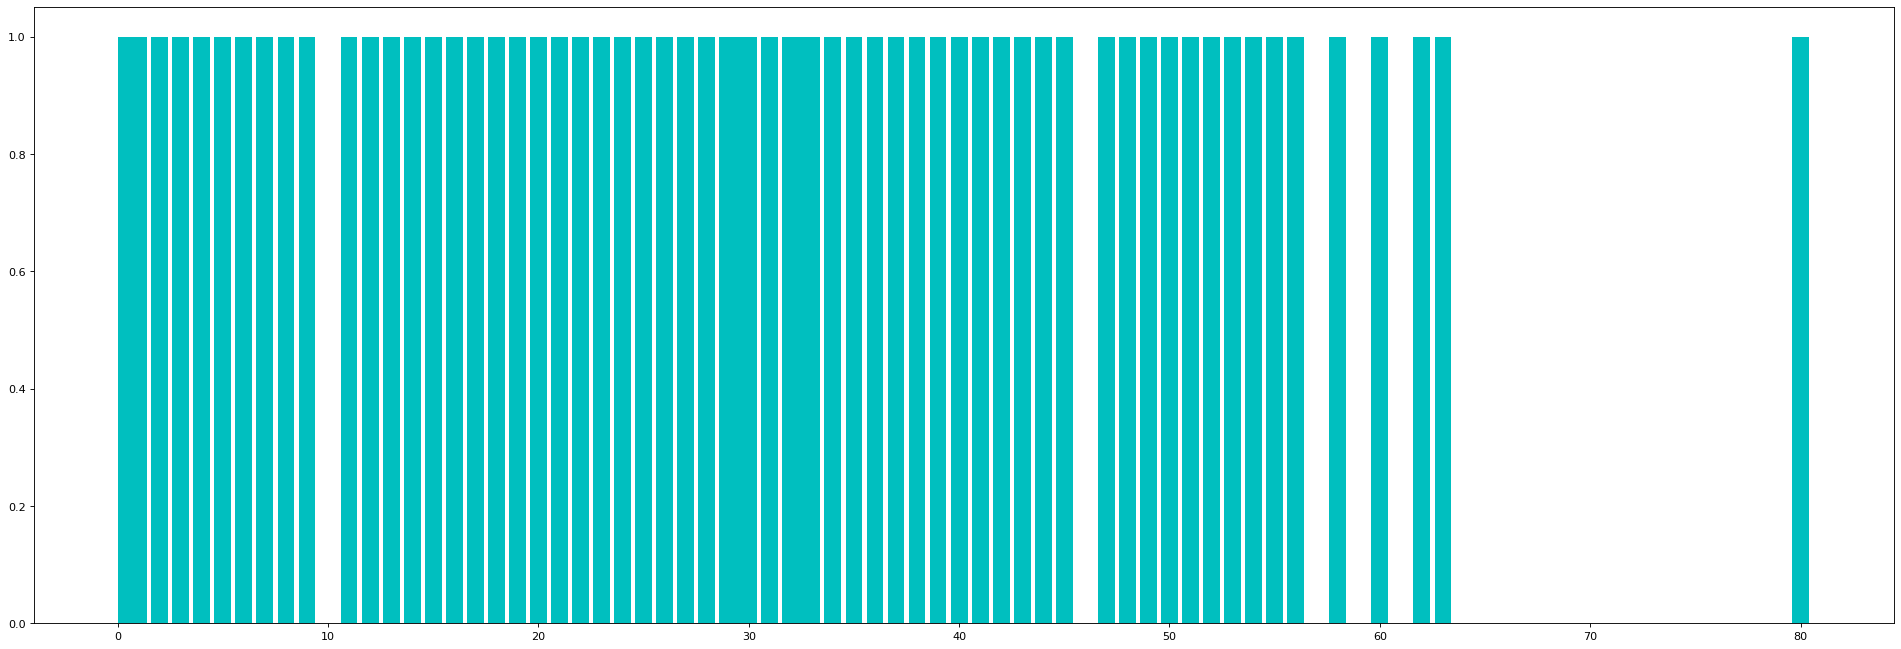

In [36]:
fig = plt.figure(figsize=(30, 10), dpi= 80)
plt.bar(df_train['Age'], df_train['Survived'], color='c')
plt.show()

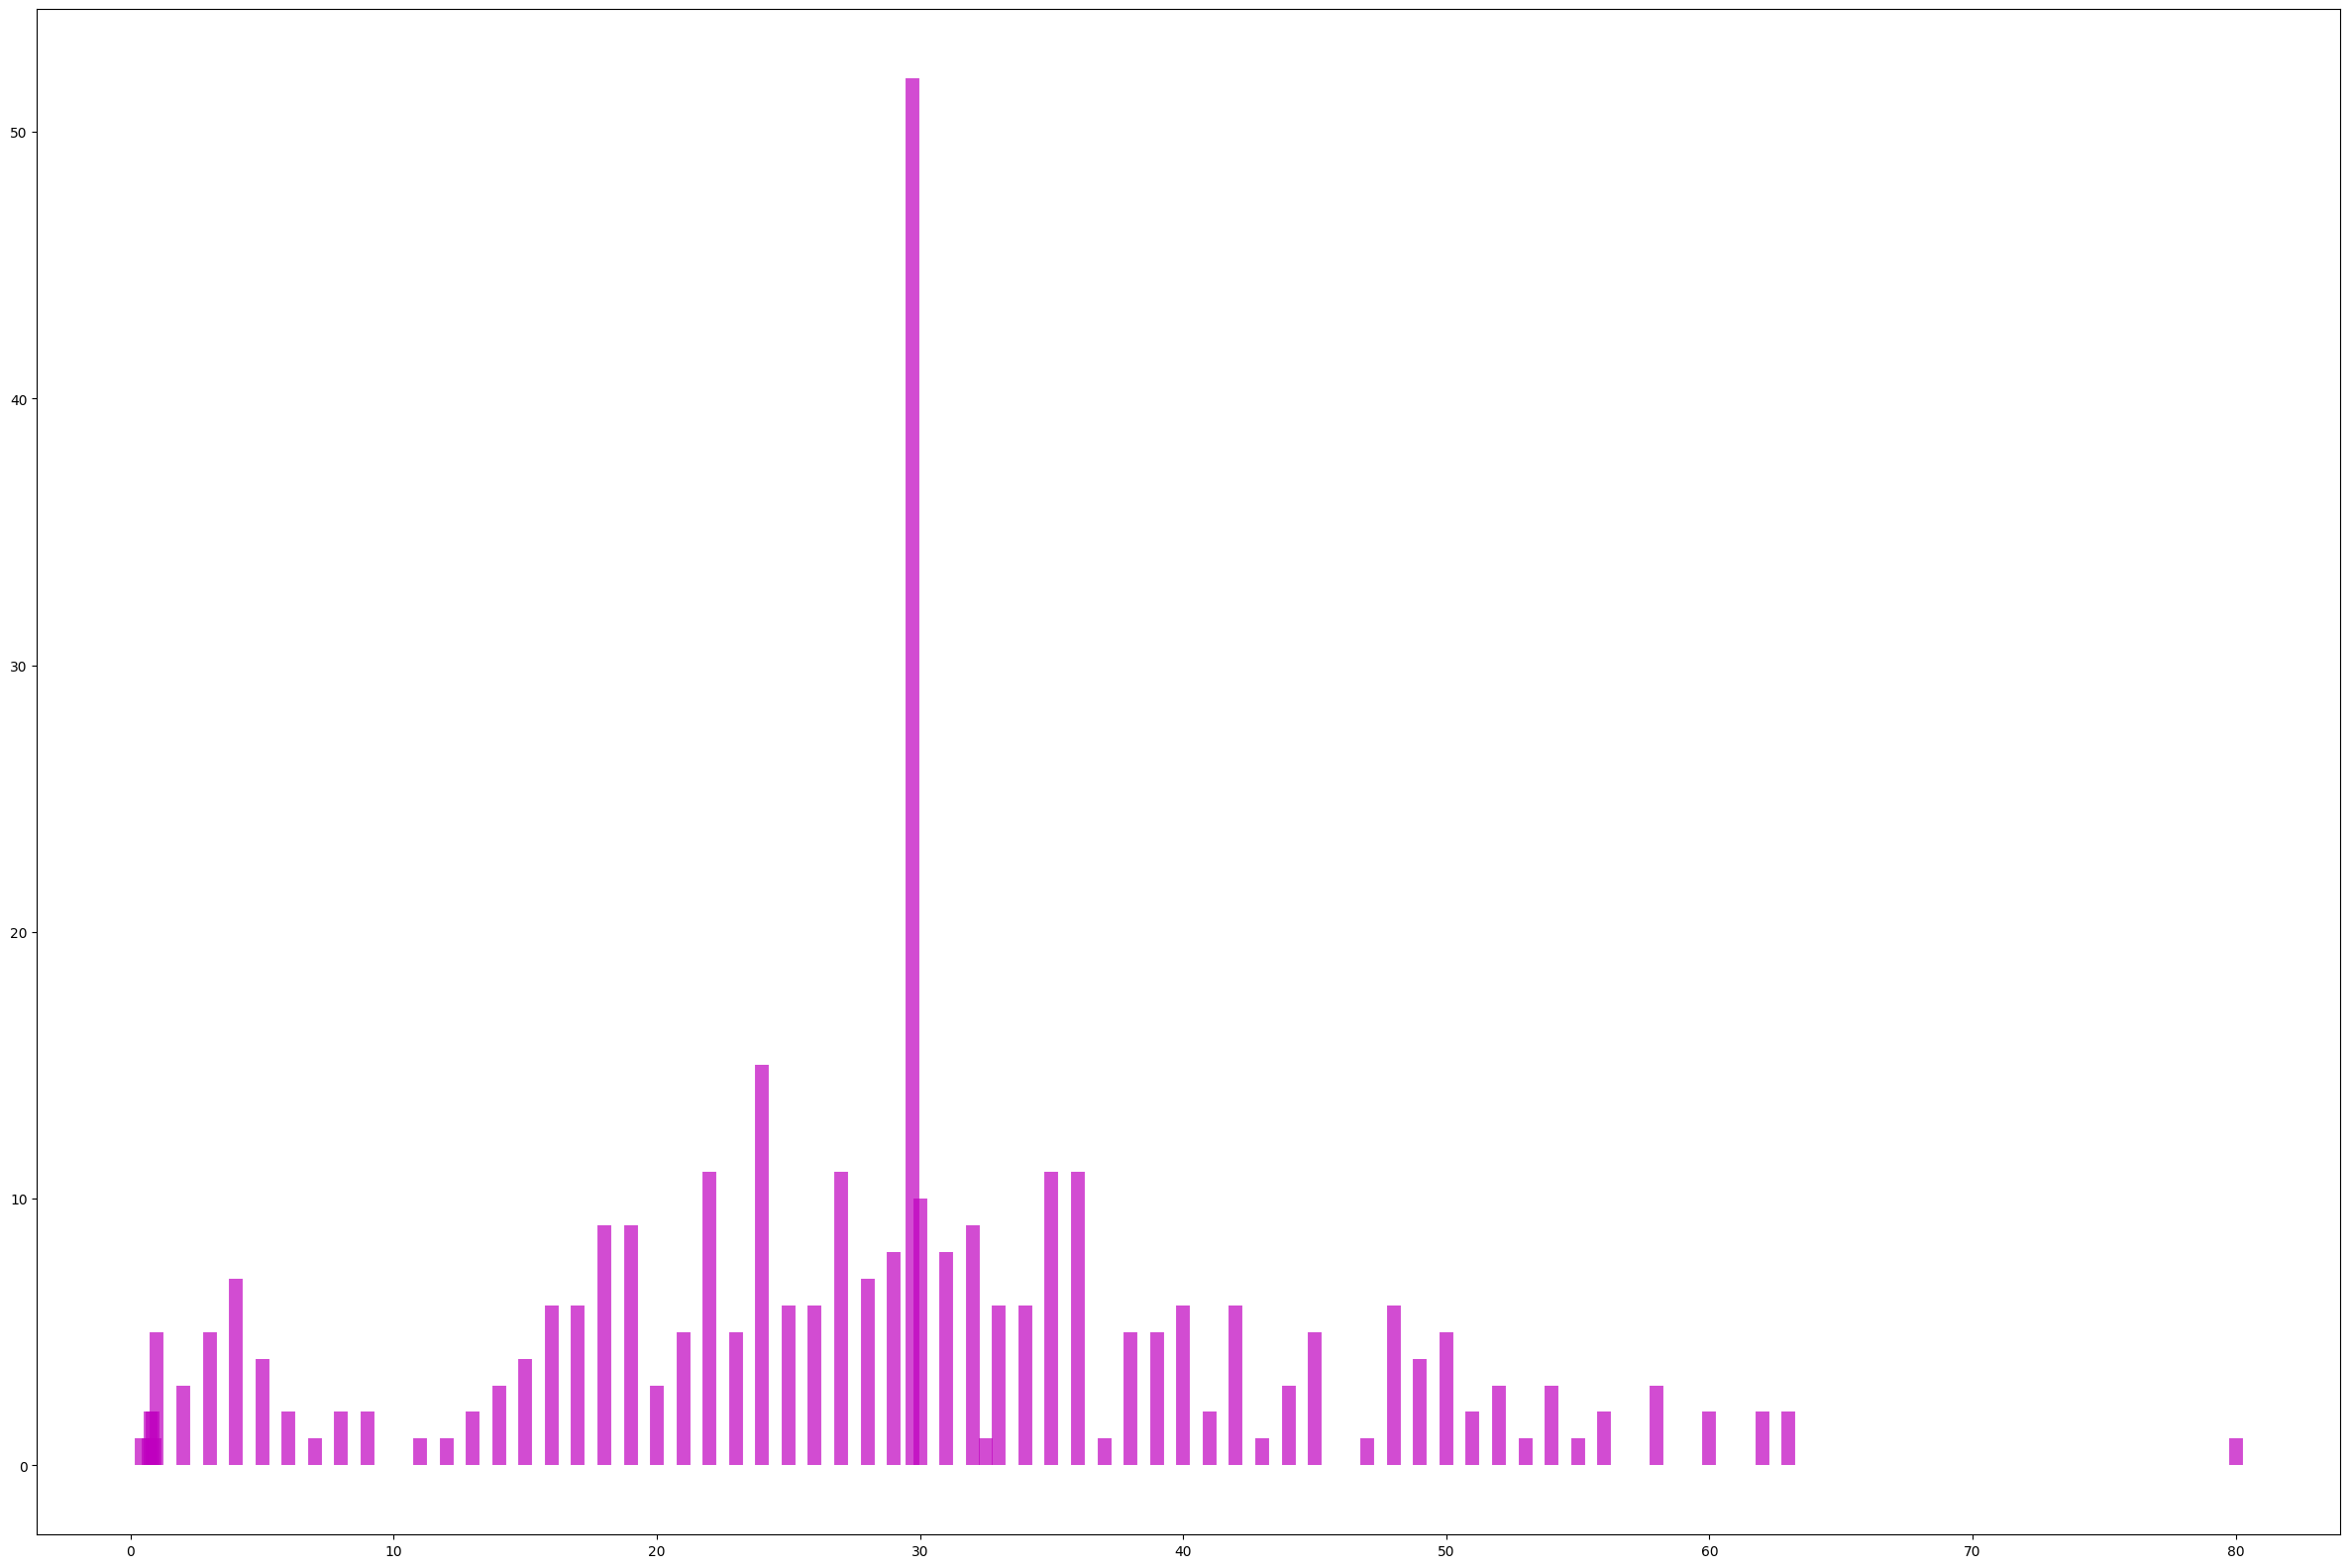

In [37]:
df = df_train[['Age', 'Survived']].groupby('Age').apply(lambda x: x.sum())
fig, ax = plt.subplots(figsize=(30,20))
ax.vlines(x=df.index, ymin=0, ymax=df.Survived, color='m', alpha=0.7, linewidth=10)
None